# Projeto: Drunkify - Análise Exploratória de Dados
**Integrante:** Júlia Zanin Monteiro - RA: 10400678 - 10400678@mackenzista.com.br
**Síntese:** Notebook com EDA, visualizações e modelo simples para demonstrar recomendações de bebidas segundo humor e estilo musical.


In [3]:
import pandas as pd

csv_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSUnhb0Gzj-AiGcrsgMBF8R0wWelqvFdM-a85AoYn2iF_f7A7POTbuI9adKCrx7HQJ09cUTpj3dR07K/pub?output=csv"  # substitua pelo link CSV que você copiou
df = pd.read_csv(csv_url)
df.head()


,usuario_id,humor,estilo_musical,bebida_favorita,intensidade_bebida,momento_consumo
0,1,animado,pop,spritz,media,festa
1,2,feliz,jazz,whisky suave,media,relaxamento
2,3,nostalgico,jazz,whisky suave,leve,festa
3,4,tranquilo,eletronico,vodka e energetico,leve,festa
4,5,nostalgico,jazz,cocktail classico,leve,balada


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [5]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   usuario_id          30 non-null     int64 
 1   humor               30 non-null     object
 2   estilo_musical      30 non-null     object
 3   bebida_favorita     30 non-null     object
 4   intensidade_bebida  30 non-null     object
 5   momento_consumo     30 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.5+ KB


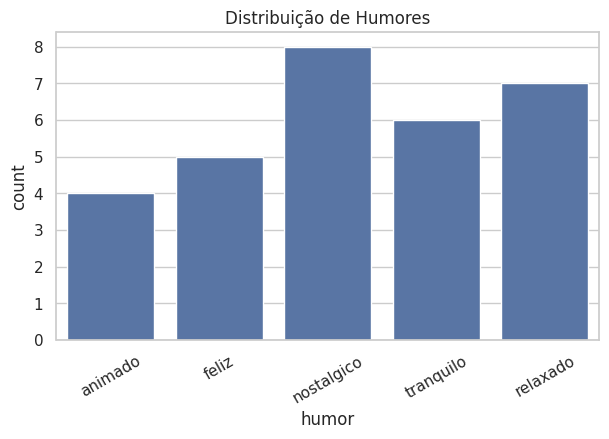

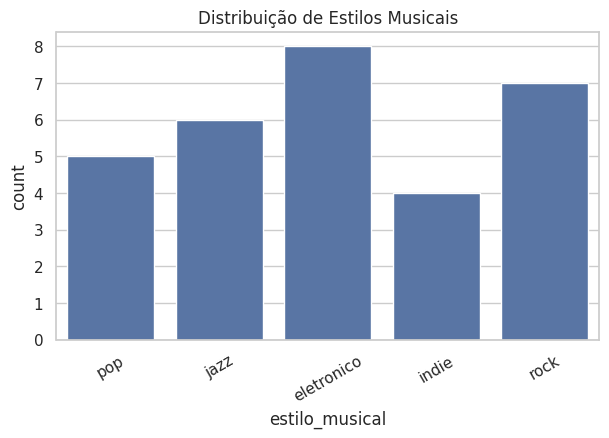

In [6]:
# humores
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='humor')
plt.title("Distribuição de Humores")
plt.xticks(rotation=30)
plt.show()

# estilos musicais
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='estilo_musical')
plt.title("Distribuição de Estilos Musicais")
plt.xticks(rotation=30)
plt.show()

In [7]:
# humor x bebida
pd.crosstab(df['humor'], df['bebida_favorita']).head()

bebida_favorita,caipirinha,cerveja artesanal,cocktail classico,drink energetico,gin tonica,mojito,rum,sidra,spritz,vinho tinto,vodka e energetico,whisky,whisky suave
humor,,,,,,,,,,,,,
animado,0,2,0,0,0,0,0,0,1,0,1,0,0
feliz,0,0,0,0,0,1,2,0,0,0,0,1,1
nostalgico,0,1,1,1,0,0,0,1,2,0,1,0,1
relaxado,1,0,1,0,2,1,0,0,0,1,0,1,0
tranquilo,0,0,0,1,0,0,0,0,1,1,2,1,0


In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

le_humor = LabelEncoder()
df['humor_encoded'] = le_humor.fit_transform(df['humor'].astype(str))

le_musica = LabelEncoder()
df['estilo_musical_encoded'] = le_musica.fit_transform(df['estilo_musical'].astype(str))

le_bebida = LabelEncoder()
df['bebida_encoded'] = le_bebida.fit_transform(df['bebida_favorita'].astype(str))

X = df[['humor_encoded', 'estilo_musical_encoded']]
y = df['bebida_encoded']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Acurácia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))


Acurácia: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [14]:
os.makedirs('/content/drunkify_artifacts', exist_ok=True)

joblib.dump(clf, '/content/drunkify_artifacts/dt_bebida_model.joblib')
joblib.dump(le_humor, '/content/drunkify_artifacts/le_humor.joblib')
joblib.dump(le_musica, '/content/drunkify_artifacts/le_musica.joblib')
joblib.dump(le_bebida, '/content/drunkify_artifacts/le_bebida.joblib')

plt.figure(figsize=(7,4))
sns.countplot(data=df, x='humor')
plt.title("Distribuição de Humores")
plt.tight_layout()
plt.savefig('/content/drunkify_artifacts/dist_humor.png')
plt.close()

print("Artefatos salvos em /content/drunkify_artifacts")


Artefatos salvos em /content/drunkify_artifacts
